In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Speficy each path

In [2]:
dataset = "HandGestureDataSet/model/number.csv"
model_save_path = 'HandGestureDataSet/model/hand_number.hdf5'
tflite_save_path = 'HandGestureDataSet/model/hand_number.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset Reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Building

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [8]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [9]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
9/9 [==============================] - 2s 129ms/step - loss: 1.6589 - accuracy: 0.1903 - val_loss: 1.5571 - val_accuracy: 0.4252

Epoch 00001: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.6180 - accuracy: 0.2196 - val_loss: 1.5336 - val_accuracy: 0.4226

Epoch 00002: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.5770 - accuracy: 0.2445 - val_loss: 1.5075 - val_accuracy: 0.2835

Epoch 00003: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 1.5615 - accuracy: 0.2809 - val_loss: 1.4668 - val_accuracy: 0.3648

Epoch 00004: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 1.5019 - accuracy: 0.3742 - val_loss: 1.4273 - val_accuracy: 0.3990

Epoch 000


Epoch 00039: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 40/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.8216 - accuracy: 0.7063 - val_loss: 0.4946 - val_accuracy: 0.9738

Epoch 00040: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 41/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.8302 - accuracy: 0.6798 - val_loss: 0.4833 - val_accuracy: 0.9711

Epoch 00041: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 42/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.8080 - accuracy: 0.6873 - val_loss: 0.4659 - val_accuracy: 0.9738

Epoch 00042: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 43/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.7605 - accuracy: 0.7267 - val_loss: 0.4495 - val_accuracy: 0.9738

Epoch 00043: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 44/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.8

9/9 [==============================] - 0s 8ms/step - loss: 0.5228 - accuracy: 0.8010 - val_loss: 0.2121 - val_accuracy: 0.9948

Epoch 00078: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 79/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.5446 - accuracy: 0.7760 - val_loss: 0.2029 - val_accuracy: 0.9921

Epoch 00079: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 80/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5641 - accuracy: 0.7681 - val_loss: 0.1973 - val_accuracy: 0.9921

Epoch 00080: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 81/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.8023 - val_loss: 0.1952 - val_accuracy: 0.9921

Epoch 00081: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 82/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5300 - accuracy: 0.8252 - val_loss: 0.1899 - val_accuracy: 0.9921

Epoch 00082: saving


Epoch 00116: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 117/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4658 - accuracy: 0.8137 - val_loss: 0.1293 - val_accuracy: 0.9974

Epoch 00117: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 118/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4397 - accuracy: 0.8347 - val_loss: 0.1248 - val_accuracy: 0.9948

Epoch 00118: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 119/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4650 - accuracy: 0.8134 - val_loss: 0.1286 - val_accuracy: 0.9948

Epoch 00119: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 120/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4808 - accuracy: 0.8171 - val_loss: 0.1374 - val_accuracy: 0.9948

Epoch 00120: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 121/1000
9/9 [==============================] - 0s 8ms/step - loss

9/9 [==============================] - 0s 8ms/step - loss: 0.3715 - accuracy: 0.8546 - val_loss: 0.1046 - val_accuracy: 0.9974

Epoch 00155: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 156/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.3795 - accuracy: 0.8600 - val_loss: 0.1009 - val_accuracy: 0.9974

Epoch 00156: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 157/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.3975 - accuracy: 0.8488 - val_loss: 0.1013 - val_accuracy: 0.9974

Epoch 00157: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 158/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.3737 - accuracy: 0.8654 - val_loss: 0.1007 - val_accuracy: 0.9974

Epoch 00158: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 159/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4169 - accuracy: 0.8457 - val_loss: 0.0995 - val_accuracy: 0.9948

Epoch 00159: sav

In [10]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 4ms/step - loss: 0.0940 - accuracy: 0.9921


In [11]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [13]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.0204391e-03 5.5488814e-02 9.1487789e-01 2.7604574e-02 8.3155428e-06]
2


# Confusion Matrix

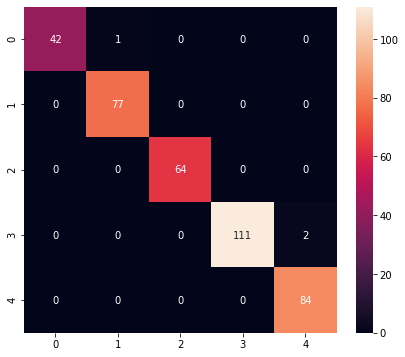

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        77
           2       1.00      1.00      1.00        64
           3       1.00      0.98      0.99       113
           4       0.98      1.00      0.99        84

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert Model to Tensorflow Lite

In [15]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [16]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpzgwzooav\assets


6400

# Inference Test

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0204403e-03 5.5488825e-02 9.1487789e-01 2.7604578e-02 8.3155510e-06]
2
